# Predicting Item Consumption with XGBoost

## Project Introduction

This project aims to predict the monthly consumption of various items using historical consumption data from the past three years. The predictions will help in inventory management and demand forecasting. We will use XGBoost, a powerful machine learning algorithm, to build our predictive models.


In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load and prepare data
data = pd.read_csv('data.csv')


## Data Preparation

We start by reshaping the data to have a proper format for our analysis. We melt the data frame to have monthly consumption in a single column, then extract and correct the year and month columns.


In [ ]:
# Reshape data
monthly_data = pd.melt(data, id_vars=['ITEM DESCRIPTION'],
                       value_vars=[col for col in data.columns if 'JANUARY' in col or 'FEBRUARY' in col or 'MARCH' in col or 'APRIL' in col or 'MAY' in col or 'JUNE' in col or 'JULY' in col or 'AUGUST' in col or 'SEPTEMBER' in col or 'OCTOBER' in col or 'NOVEMBER' in col or 'DECEMBER' in col],
                       var_name='Month_Year', value_name='Consumption')

# Extract year and month
monthly_data['Year'] = monthly_data['Month_Year'].str.split('_').str[0]
monthly_data['Month'] = monthly_data['Month_Year'].str.split('_').str[1]

# Correct the reversed columns
monthly_data['Year'], monthly_data['Month'] = monthly_data['Month'], monthly_data['Year']

# Create a date column
monthly_data['Date'] = pd.to_datetime(monthly_data['Month'] + ' ' + monthly_data['Year'], format='%B %Y')

# Drop unnecessary columns
monthly_data = monthly_data.drop(columns=['Month_Year'])

# Sort by date
monthly_data = monthly_data.sort_values(by='Date')

# Set Date as index
monthly_data.set_index('Date', inplace=True)
monthly_data.head()


## Data Exploration and Visualization

We explore the data to understand the consumption patterns and visualize them to identify any trends or seasonality.


In [ ]:
# Plot consumption patterns for a sample item
sample_item = monthly_data['ITEM DESCRIPTION'].unique()[0]
sample_data = monthly_data[monthly_data['ITEM DESCRIPTION'] == sample_item]

plt.figure(figsize=(14, 7))
plt.plot(sample_data.index, sample_data['Consumption'], marker='o', linestyle='-', color='deepskyblue' )
plt.title(f'Consumption Pattern for {sample_item}')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.grid(True)
plt.show()


## Model Training and Evaluation

We use XGBoost to train our model. The data is split into training and test sets to evaluate the model's performance. The mean squared error (MSE) is used as the evaluation metric.


In [ ]:
# Prepare for each item
items = monthly_data['ITEM DESCRIPTION'].unique()

future_predictions_all_items = []

for item in items:
    # Filter data for the current item
    item_data = monthly_data[monthly_data['ITEM DESCRIPTION'] == item].copy()

    # Prepare features and target
    item_data['Month'] = item_data.index.month
    item_data['Year'] = item_data.index.year
    item_data['Day_of_Week'] = item_data.index.dayofweek

    # Example target variable: Predict next month's consumption
    item_data['Next_Consumption'] = item_data['Consumption'].shift(-1)
    item_data = item_data.dropna()

    # Features and target
    X = item_data[['Month', 'Year', 'Day_of_Week']]
    y = item_data['Next_Consumption']

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Initialize XGBoost regressor
    model = xgb.XGBRegressor(objective='reg:squarederror')

    # Train the model
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'Item: {item} - Mean Squared Error: {mse}')


## Future Predictions

We predict the consumption for the next 12 months using the trained model.


In [ ]:
    # Example: Predict next month's consumption for the next 12 months
future_dates = pd.date_range(start=item_data.index.max() + pd.DateOffset(months=1), periods=12, freq='ME')
future_features = pd.DataFrame({
    'Month': future_dates.month,
    'Year': future_dates.year,
    'Day_of_Week': future_dates.dayofweek
})

# Predict future consumption
future_predictions = model.predict(future_features)

# Create DataFrame for future predictions
future_df = pd.DataFrame({'Date': future_dates, 'Item': item, 'Predicted_Consumption': future_predictions})
future_predictions_all_items.append(future_df)

# Combine all future predictions into a single DataFrame
final_predictions = pd.concat(future_predictions_all_items)
final_predictions.head()


## Detailed Comparison and Visualization

In this section, we will compare the historical consumption and the predicted consumption for a specific item (e.g., the first item in the dataset). This will help us understand how well the model performs and visualize the consumption trends.


Item: 18 - Reactive Protein (CRP) - 300t - Dt Slides - Vitros 250 79 - Mean Squared Error: 21.424016118056745
Item: Ringer Lactate - Compound Sodium Lactate Injection Ip - 500ml 79 - Mean Squared Error: 60.48618199172645
Item: Ring File 79 - Mean Squared Error: 7.072929541980656
Item: Ribbon Gauze Non-Sterile (VAGINAL Pack) 5m x 5cm 79 - Mean Squared Error: 0.10434115401241639
Item: Ribbon Gauze Non-Sterile (ENT Pack) 5m x 1.25cm 79 - Mean Squared Error: 0.3468248159036584
Item: Ribbon - Barcode Label Printer Ribbon Zebra Tlc Label Roll+Wax 79 - Mean Squared Error: 17.00933134724645
Item: RF Reagent Pack 79 - Mean Squared Error: 6.047499193924473
Item: Reservoir Bag - Infant 79 - Mean Squared Error: 1.4419935949969198
Item: Reservoir Bag - Child 79 - Mean Squared Error: 1.0590810123452234
Item: Reservoir Bag - Adult 79 - Mean Squared Error: 2.4075126659710664
Item: Referral Form (H-1) - A4 79 - Mean Squared Error: 5.003692543739196
Item: Recordable Cd With Cover 79 - Mean Squared Error

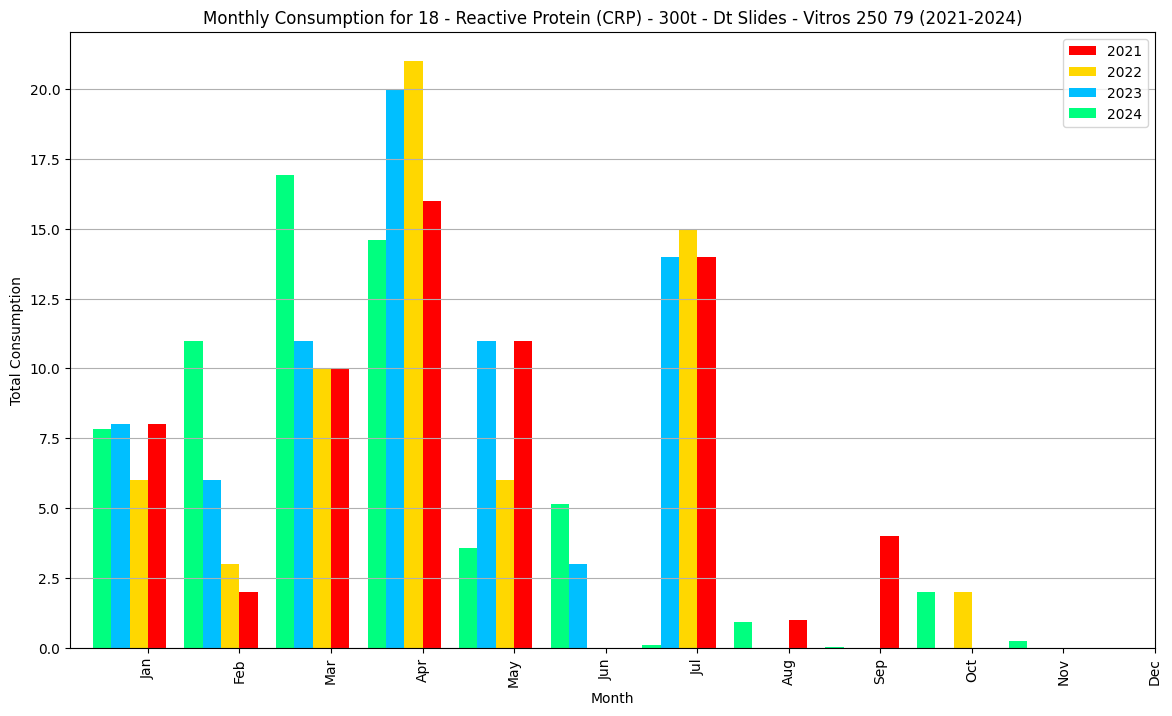

In [57]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load and prepare data
data = pd.read_csv('data.csv')

# Reshape data
monthly_data = pd.melt(data, id_vars=['ITEM DESCRIPTION'],
                       value_vars=[col for col in data.columns if 'JANUARY' in col or 'FEBRUARY' in col or 'MARCH' in col or 'APRIL' in col or 'MAY' in col or 'JUNE' in col or 'JULY' in col or 'AUGUST' in col or 'SEPTEMBER' in col or 'OCTOBER' in col or 'NOVEMBER' in col or 'DECEMBER' in col],
                       var_name='Month_Year', value_name='Consumption')

# Extract year and month
monthly_data['Year'] = monthly_data['Month_Year'].str.split('_').str[0]
monthly_data['Month'] = monthly_data['Month_Year'].str.split('_').str[1]

# Correct the reversed columns
monthly_data['Year'], monthly_data['Month'] = monthly_data['Month'], monthly_data['Year']

# Create a date column
monthly_data['Date'] = pd.to_datetime(monthly_data['Month'] + ' ' + monthly_data['Year'], format='%B %Y')

# Drop unnecessary columns
monthly_data = monthly_data.drop(columns=['Month_Year'])

# Sort by date
monthly_data = monthly_data.sort_values(by='Date')

# Set Date as index
monthly_data.set_index('Date', inplace=True)
# Prepare for each item
items = monthly_data['ITEM DESCRIPTION'].unique()

future_predictions_all_items = []

for item in items:
    # Filter data for the current item
    item_data = monthly_data[monthly_data['ITEM DESCRIPTION'] == item].copy()

    # Prepare features and target
    item_data['Month'] = item_data.index.month
    item_data['Year'] = item_data.index.year
    item_data['Day_of_Week'] = item_data.index.dayofweek

    # Example target variable: Predict next month's consumption
    item_data['Next_Consumption'] = item_data['Consumption'].shift(-1)
    item_data = item_data.dropna()

    # Features and target
    X = item_data[['Month', 'Year', 'Day_of_Week']]
    y = item_data['Next_Consumption']

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Initialize XGBoost regressor
    model = xgb.XGBRegressor(objective='reg:squarederror')

    # Train the model
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'Item: {item} - Mean Squared Error: {mse}')

    # Example: Predict next month's consumption for the next 12 months
    future_dates = pd.date_range(start=item_data.index.max() + pd.DateOffset(months=1), periods=12, freq='ME')
    future_features = pd.DataFrame({
        'Month': future_dates.month,
        'Year': future_dates.year,
        'Day_of_Week': future_dates.dayofweek
    })

    # Predict future consumption
    future_predictions = model.predict(future_features)

    # Create DataFrame for future predictions
    future_df = pd.DataFrame({'Date': future_dates, 'Item': item, 'Predicted_Consumption': future_predictions})
    future_predictions_all_items.append(future_df)

# Combine all future predictions into a single DataFrame
final_predictions = pd.concat(future_predictions_all_items)
# Select a specific item for detailed analysis
specific_item = items[0]

# Historical data for the specific item
historical_data = monthly_data[monthly_data['ITEM DESCRIPTION'] == specific_item].copy()

# Predicted data for the specific item
predicted_data = final_predictions[final_predictions['Item'] == specific_item].copy()

# Add year and month columns to historical data
historical_data['Year'] = historical_data.index.year
historical_data['Month'] = historical_data.index.month

# Add year and month columns to predicted data
predicted_data['Year'] = predicted_data['Date'].dt.year
predicted_data['Month'] = predicted_data['Date'].dt.month

# Plot the bar graph
plt.figure(figsize=(14, 8))

# Historical data for 2021
hist_2021 = historical_data[historical_data['Year'] == 2021].groupby('Month')['Consumption'].sum()
hist_2021.plot(kind='bar', color='red', position=0, width=0.2, label='2021', align='center')

# Historical data for 2022
hist_2022 = historical_data[historical_data['Year'] == 2022].groupby('Month')['Consumption'].sum()
hist_2022.plot(kind='bar', color='gold', position=1, width=0.2, label='2022', align='center')

# Historical data for 2023
hist_2023 = historical_data[historical_data['Year'] == 2023].groupby('Month')['Consumption'].sum()
hist_2023.plot(kind='bar', color='deepskyblue', position=2, width=0.2, label='2023', align='center')

# Predicted data for 2024
pred_2024 = predicted_data[predicted_data['Year'] == 2024].groupby('Month')['Predicted_Consumption'].sum()
pred_2024.plot(kind='bar', color='springgreen', position=3, width=0.2, label='2024', align='center')

plt.title(f'Monthly Consumption for {specific_item} (2021-2024)')
plt.xlabel('Month')
plt.ylabel('Total Consumption')
plt.legend()
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.show()
